In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np

In [2]:
viz = pd.read_csv('vizualizing.csv') # read csv into df 

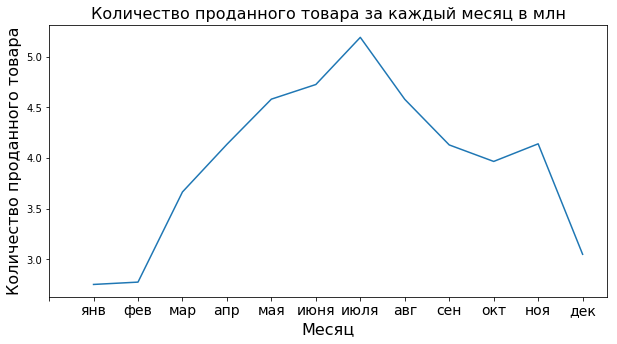

In [3]:
prodmonth = viz.groupby('month').sales.sum() / 1000000 # groupby month sum up sales for every month
plt.figure(figsize=(10,5)) # plot figure
plt.plot(prodmonth) # plot df
plt.xticks(np.arange(13), ('', 'янв', 'фев', 'мар', 'апр', 'мая', 'июня', 'июля', 'авг', 'сен', 'окт', 'ноя', 'дек'), size=14)
#change x tick labels
plt.xlabel('Месяц', fontsize = 16) # change x label
plt.ylabel('Количество проданного товара', fontsize = 16) # change y label
plt.title('Количество проданного товара за каждый месяц в млн', fontsize = 16) # change title
plt.savefig('productpermonth.png') # save plot into png

### Летом товар продается в 2 раза лучше, чем зимой.

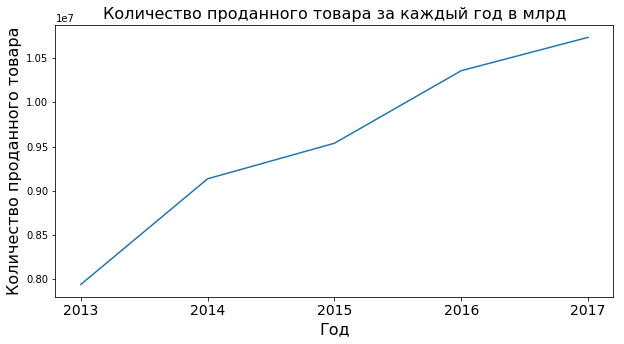

In [4]:
prodyear = viz.groupby('year').sales.sum() # group up year and sum up sales
plt.figure(figsize=(10,5))# plot figure
plt.plot(prodyear) # plot df
plt.xticks([2013, 2014, 2015, 2016, 2017], ['2013', '2014', '2015', '2016', '2017'], size = 14) #change x tick labels
plt.xlabel('Год', fontsize = 16) # change x label
plt.ylabel('Количество проданного товара', fontsize = 16) # change y label
plt.title('Количество проданного товара за каждый год в млрд', fontsize = 16) # change title
plt.savefig('productperyear.png') # save plot as png

### С каждым годом количество проданного товара увеличивается.

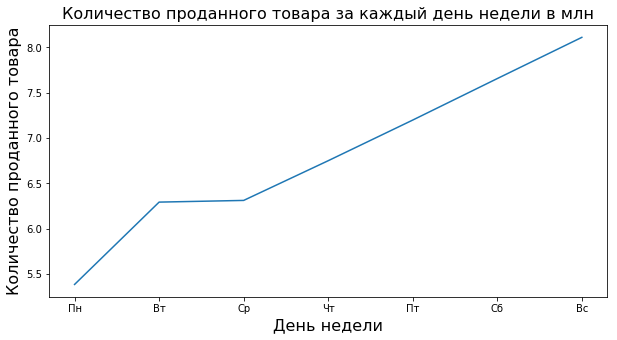

In [5]:
prodweek = viz.groupby('weekday').sales.sum() / 1000000 # group up weekday and sum up sales
plt.figure(figsize=(10,5)) # plot figure
plt.plot(prodweek) # plot df
plt.xticks([0,1,2,3,4,5,6], ['Пн', 'Bт', 'Ср', 'Чт', 'Пт', 'Сб', 'Bc']) #change x tick labels
plt.xlabel('День недели', fontsize=16) # change x label
plt.ylabel('Количество проданного товара', fontsize=16) # change y label
plt.title('Количество проданного товара за каждый день недели в млн', fontsize=16) # change title
plt.savefig('prodperweek.png') # save plot as png

### Чем ближе к выходным тем больше люди хотят потреблять.

<Figure size 720x360 with 0 Axes>

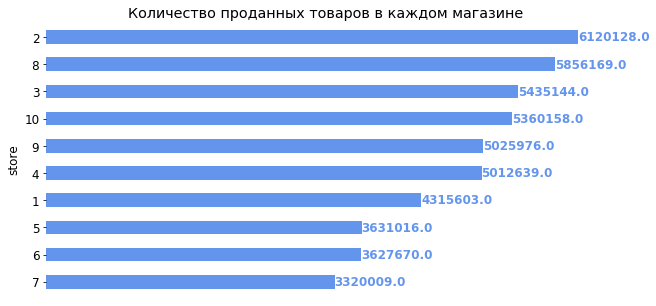

In [6]:
matplotlib.rcParams.update({'font.size': 12}) # make font size equals to 16
prodstore = viz.groupby('store').sales.sum().sort_values(ascending=False) # group up stores and sum up sales
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.05 # width
ind = np.arange(len(prodstore))
prodstore.plot(kind='barh', color = '#6495ED', align = 'center')
for i, v in enumerate(prodstore.values): # change position of values on barhs
    ax.text(v + 1, i + 0.13, str(v), fontweight='bold', color='#6495ED')
for spine in plt.gca().spines.values(): #get rid of frame
    spine.set_visible(False)
ax.axes.get_xaxis().set_visible(False) #get rid of x ticks
ax.invert_yaxis() # to make descending list instead of ascending
plt.title("Количество проданных товаров в каждом магазине") # set title to Количество проданных товаров в каждом магазине
plt.savefig('productperstore.png') # save plot as png

### B 5, 6, 7 магазине товары продаются хуже всего

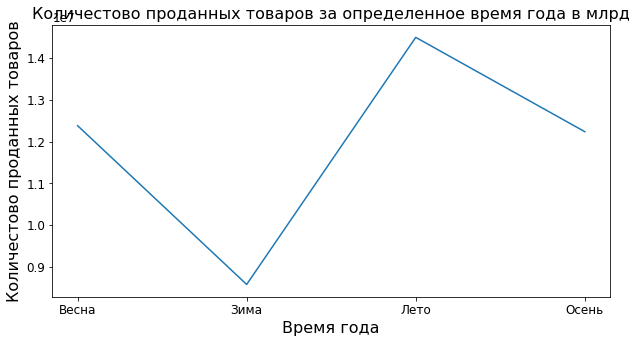

In [7]:
month_num_to_season =   { 1:'Зима',  2:'Зима', 
                          3:'Bесна',  4:'Bесна',  5:'Bесна', 
                          6:'Лето',  7:'Лето',  8:'Лето',
                          9:'Осень', 10:'Осень', 11:'Осень',
                         12:'Зима'}
viz1 = viz.copy() #get copy of df
viz1['month'] = viz1['month'].map(month_num_to_season) # replace numbers with seasons
prodperseason = viz1.groupby('month').sales.sum() # sum up sales for every season
plt.figure(figsize=(10,5))
plt.plot(prodperseason)
plt.xlabel('Bремя года', fontsize=16) # change x label
plt.ylabel('Количестово проданных товаров', fontsize=16) # change y label
plt.title('Количестово проданных товаров за определенное время года в млрд', fontsize=16) # change title
plt.savefig('prodperseason.png') # save plot as png

### Как мы и видели ранее наибольшее количество товаров продается летом, наименьшее зимой, между осенью и весной почти нет разницы.

<Figure size 720x360 with 0 Axes>

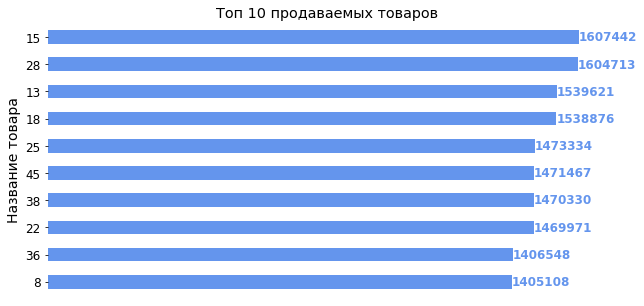

In [8]:
topprod = viz.groupby('item').sales.sum().sort_values(ascending=False)[:10].astype(int) # group up item, then sum up sales, then sort, then get to 10 values
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.05 # width
ind = np.arange(len(topprod))
topprod.plot(kind='barh', color = '#6495ED', align = 'center')
for i, v in enumerate(topprod.values): # change position of values on barhs
    ax.text(v + 1, i + 0.13, str(v), fontweight='bold', color='#6495ED')
for spine in plt.gca().spines.values(): #get rid of frame
    spine.set_visible(False)
plt.ylabel('Название товара', fontsize=14)
ax.axes.get_xaxis().set_visible(False) #get rid of x ticks
ax.invert_yaxis() # to make descending list instead of ascending
plt.title("Топ 10 продаваемых товаров") # set title to Топ 10 продоваемых товаров
plt.savefig('topprod.png') # save plot as png

### Лучше всего продаются эти товары.